In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import date2num
import datetime
import math
%matplotlib inline

### Advanced (requires joining the DOF rolling sales w/ the Dept. of City Planning’s PLUTO dataset)
1.       What does the distribution of sale-price look like for 2014 sales of residential properties having more than 6 floors?
2.       What is the total OfficeArea sold in 2014?

In [2]:
class SaleBorough:
    def __init__(self, rsframes, plutoframes, year, Borough):
        
        rolling = pd.read_excel(rsframes,skiprows = 4)
        pluto = pd.read_csv(plutoframes)
        
        dftemp = pd.read_excel('2015Detail/rollingsales_brooklyn.xls',skiprows = 4)
        rolling.columns = list(dftemp.columns.values)
        self.year = year
        self.borough = Borough
        #cleaning data 
        
        self.rolling = rolling
        self.pluto = pluto
                                
    def dist6floorUp(self):
        borough =self.borough
        year = self.year
        rolling = self.rolling
        pluto = self.pluto
        
        rollingRd = rolling.loc[rolling['TAX CLASS AT PRESENT'].isin([1,2,'1A','1B','2A','2B','2C'])]
        rollingRd['UID'] = rollingRd['BLOCK'].map(str)+'__'+rollingRd['LOT'].map(str)
        rollingRDwUID = rollingRd.set_index('UID')
        #!import # 
        # for the property that has been sold multiple time, merge those sale to one row and sum the sale-price for each sales
        rollingRDUID = rollingRDwUID.groupby(rollingRDwUID.index).sum()
        rollingRDUID.reset_index(level= 0,inplace = True)
        rollingRDUID2= rollingRDUID.loc[(rollingRDUID['SALE PRICE']>0)]
        
        plutoC = pd.DataFrame(pluto,columns = ['Block','Lot','Address','NumFloors','OfficeArea'])
        plutoC = plutoC.rename(columns={'Block': 'BLOCK', 'Lot': 'LOT'})

        df = pd.merge(rollingRDUID, plutoC, on=['BLOCK','LOT'])
        df2 = pd.merge(rollingRDUID2, plutoC, on=['BLOCK','LOT'])
        
        df6floorUp = df.loc[(df['NumFloors']>6)]
        df6floorUpSales = df6floorUp['SALE PRICE'].values
        df6floorUpSales = np.round(df6floorUpSales/1000000.,2)
        
        df6floorUp2 = df2.loc[(df2['NumFloors']>6)]
        df6floorUpSales2 = df6floorUp2['SALE PRICE'].values
        df6floorUpSales2 = np.round(df6floorUpSales2/1000000.,2)
        
        fig = plt.figure()
        if len(df6floorUpSales)>1:
            fig.add_subplot(211)

            plt.hist(df6floorUpSales, bins = 25)
            plt.ylabel(' # of sales')
            plt.xlabel('Accumulativity sale-price (million dollor) for each property')
            plt.title('distribution of sale-price look for '+borough+' in '+year)        
            plt.show()
        elif len(df6floorUpSales)==1:
            print 'only have one sale record which the price is '+str(df6floorUpSales[0])

        if len(df6floorUpSales2)>1:
            fig.add_subplot(212)
            
            plt.hist(df6floorUpSales2, bins = 25)
            plt.ylabel('frequency')
            plt.xlabel('Accumulativity sale-price(million dollor) without the sale $0 Sales Price')
            plt.title('distribution of sale-price look for '+borough+' in'+year)
            plt.show()

        # plot a second plot showing that result without the zero price
        
        return df6floorUpSales
    
    def OfficeArea(self):
        borough =self.borough
        year = self.year
        rolling = self.rolling
        pluto = self.pluto
        
        rolling['UID'] = rolling['BLOCK'].map(str)+'__'+rolling['LOT'].map(str)
        plutoC = pd.DataFrame(pluto,columns = ['Block','Lot','Address','OfficeArea'])
        plutoC['UID'] = plutoC['Block'].map(str)+'__'+plutoC['Lot'].map(str)
        df = pd.merge(rolling, plutoC,how='left', on=['UID'])
        totalOfficeArea = df['OfficeArea'].sum()
        # unit square fit
        print 'The total OfficeArea sold in ' + year + ' for '+ borough+' is '+ str(totalOfficeArea) + ' square fit'
        return totalOfficeArea

In [3]:
bx = SaleBorough('2014Detail/2014_bronx.xls','nyc_pluto/BX.csv','2014','bronx')
bk = SaleBorough('2014Detail/2014_brooklyn.xls','nyc_pluto/BK.csv','2014','brooklyn')
mn = SaleBorough('2014Detail/2014_manhattan.xls','nyc_pluto/Mn.csv','2014','manhattan')
qn = SaleBorough('2014Detail/2014_queens.xls','nyc_pluto/QN.csv','2014','queens')
si = SaleBorough('2014Detail/2014_statenisland.xls','nyc_pluto/SI.csv','2014','statenisland')

/Users/geographer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (6,7,8,10,27,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/geographer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (6,7,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Users/geographer/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (4,6,7,8,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


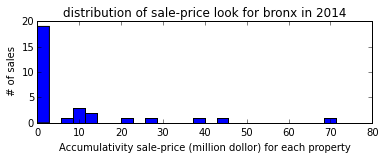

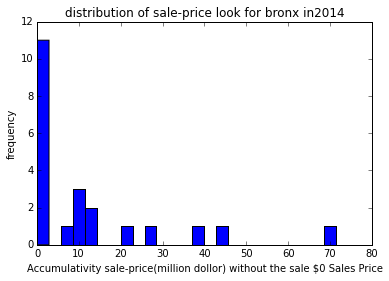

In [4]:
bx6up = bx.dist6floorUp()

/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


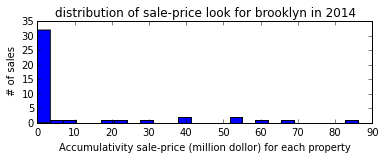

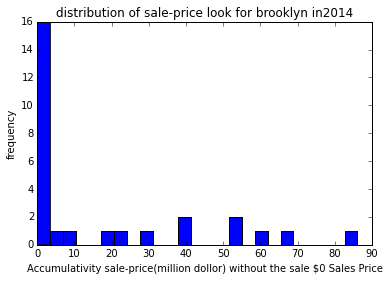

In [5]:
bk6up = bk.dist6floorUp()

/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


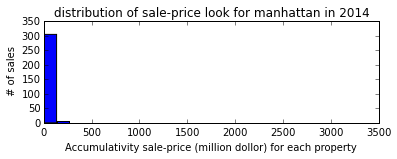

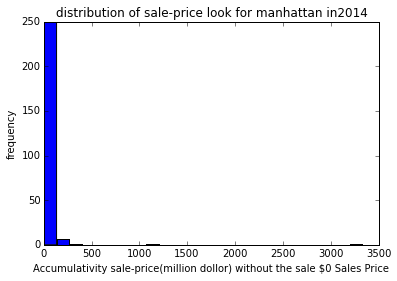

In [6]:
mn6up = mn.dist6floorUp()

/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


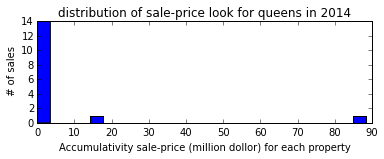

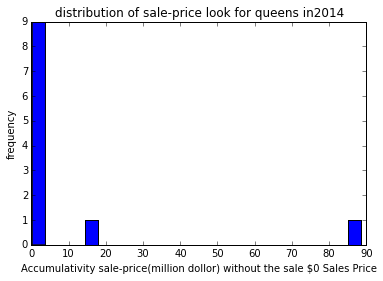

In [7]:
qn6up = qn.dist6floorUp()

In [8]:
si6up = si.dist6floorUp()

only have one sale record which the price is 0.0


/Users/geographer/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
bxOfficeArea = bx.OfficeArea()
bkOfficeArea = bk.OfficeArea()
mnOfficeArea = mn.OfficeArea()
qnOfficeArea = qn.OfficeArea()
siOfficeArea = si.OfficeArea()


The total OfficeArea sold in 2014 for bronx is 3000950.0 square fit
The total OfficeArea sold in 2014 for brooklyn is 3341576.0 square fit
The total OfficeArea sold in 2014 for manhattan is 0.0 square fit
The total OfficeArea sold in 2014 for queens is 3965805.0 square fit
The total OfficeArea sold in 2014 for statenisland is 287676.0 square fit


3. Build an interactive map showing median 2014 sale-price by neighborhood and/or ZIP-code for residential properties < $15M. Clicking on a neighborhood or ZIP will render a timeseries plot of monthly total sale-value for that polygon. It would be great to be able to see a finer-grained density of sales (as points or polygons) for the individual properties sold.

In [10]:
def combinefiles(foldername):
    from os import listdir
    df = pd.DataFrame()
    onlyfiles = [f for f in listdir(foldername)]
    for ff in onlyfiles:
        if (ff != ".DS_Store"):
            adf= pd.read_excel(foldername+'/'+ff,skiprows=4)
            df = pd.concat([df,adf])
    return df

In [11]:
detail2015 = combinefiles('2015Detail')

In [12]:
def medianSale(df):
    zips = []
    medianPrices = []
    for key,grp in df.groupby(['ZIP CODE']):
        nonZeroResult = grp.loc[grp['SALE PRICE']!=0]
        sales = nonZeroResult['SALE PRICE'].loc[nonZeroResult['SALE PRICE']<15000000]
        medianPrice = sales.quantile([0.5]).values[0]
        zips.append(key)
        medianPrices.append(medianPrice)
    x = np.asarray(zips)
    y = np.asarray(medianPrices)
    xy = np.vstack((x,y))
    out = np.transpose(xy)
    return [y,out]

In [13]:
import csv

with open('medianZip.csv', "wb") as f:
    writer = csv.writer(f)
    writer.writerows(medianSale(detail2015)[1])

In [14]:
def monthlySale(data):
    df = pd.DataFrame(data)
    countdata = data.groupby(['SALE DATE']).size()
    cSale = pd.DataFrame(countdata).reset_index()
    cSale.columns = ['SALE DATE','sales count']
    purchase_patterns = cSale.set_index('SALE DATE')
    output = purchase_patterns.resample('M',how=sum)
    return output

In [15]:
def monthlySaleTotal(dframe):
    pdf1 = dframe[['SALE PRICE','SALE DATE']]
    pdf1.index=pdf1['SALE DATE']
    ptotal1 = np.zeros((12,1))
    for month1,grp1 in pdf1.groupby(pdf1.index.month):
        tp1 = grp1['SALE PRICE'].sum()
        ptotal1[month1-1] = tp1/1000
    return ptotal1

In [17]:
# return a table that has size of total zip code, have total of three rows the first row is the zip code, second row it month,the third row is the sale growth
import csv

zips = []
saleGrowth12m = []
outA = np.chararray([1,14])
outA[0,0] = "ZIPCODE"
outA[0,1] = "MEDIANPRICE"

for key,grp in detail2015.groupby(['ZIP CODE']):
    outZ = np.zeros((1,1))+key
    outV = (monthlySaleTotal(grp)).T
    outv2 = np.zeros((1,1))+medianSale(grp)[0]
    
    output = np.hstack((outZ,outV,outv2))
    outA = np.vstack((outA,output))
with open('outputforArcMAPonline.csv', "wb") as f:
    writer = csv.writer(f)
    writer.writerows(outA)
    

In [18]:
with open('saleGrowth2015zip.csv', "wb") as f:
    writer = csv.writer(f)
    writer.writerows(outA)

In [19]:
import webbrowser
webbrowser.open('http://arcg.is/21608MS')


True

Note: the background is the heat map for median price for each zip code. Red color indicate high price 